# Immersion -- Deep Learning and ANN Lab session
![lab2](lab2.png)

## Brief Introduction to Tensorflow

**TensorFlow** is an end-to-end open source platform for machine learning. Its mostly used for Neural Networks. 

TensorFlow makes use of a computational graph framework. A Graph consists of two main components : *Nodes* and *Edges*.
*Nodes* represent the mathematical operations and produces outputs, whereas *Edges* represents the input and output tensors between these nodes. This is why it is called **TensorFlow** because multiple tensors goes inside the graph, flows through several mathematical operations, and then comes out as a final output tensor.

![Graph](graph.png)

Every successful 'run' of a computaional graph can be divided in two phases:
1. **Construction Phase** : Assembling a Computational Graph. Ex : In keras when user defines the number of layers, units per layers, loss function, optimizer, learning rate, number of epochs etc. a graph is created.
2. **Execution Phase** : Pushing the data through the graph and performing automatic differentiation (generally termed backward propagation) to update the trainable parameters. Ex: In keras when user runs 'model.fit()' it executes every node serially and updates tensors.

![run](run.gif)

**What's exactly a Tensor?**

Simply put, Tensors are multidimensional array of data. So a matrix is called a rank-2 tensor and vector a rank-1 tensor.

![tensor](tensor.png)

## Deep Neural Networks using Keras (Higher level API) with Tensorflow backend

## Import Libraries

**Please use python3 (must) and Tensorflow 2.0 (or atleast >=1.14.0)**

In [1]:
# In colab before import tensorflow
# %tensorflow_version 2.x

In [2]:
# Import Tensorflow 
import tensorflow as tf
print(tf.__version__)

# Import Keras specific modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.regularizers import l2

# import python libraries
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

# magic function for notebooks
%matplotlib inline 

# Random Seed Generator
random.seed(42) # Initialize the random number generator.
np.random.seed(42) # With the seed reset, the same set of numbers will appear every time. 
#tf.random.set_seed(42) # sets the graph-level random seed

C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

1.14.0


## Dataset

In [3]:
# Use the MNIST dataset  of Keras, already splitted to train and test sets
(Xtrain, Ytrain) , (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()

In [4]:
# size of the datsets
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Ytrain :  5


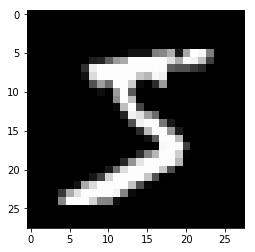

In [5]:
# print a sample data
plt.imshow(Xtrain[0], cmap='gray')
print('Ytrain : ', Ytrain[0])

In [6]:
# Normalize the data for 
# 60000 input images are in the train set.
# 10000 input images are in the test set.

# For DNN
# reshape the input set to size 28*28.
Xtraind = Xtrain.reshape(Xtrain.shape[0], 28*28)
# normalize to values between 0 and 1; set datatype as float32
Xtraind = Xtraind.astype('float32')/255 
# reshape the input set to size 28*28.
Xtestd = Xtest.reshape(Xtest.shape[0], 28*28)
# normalize to values between 0 and 1; set datatype as float32
Xtestd = Xtestd.astype('float32')/255 

# For CNN
# reshape the input set to size (28,28,1)
Xtrainc = Xtrain.reshape(Xtrain.shape[0], 28, 28, 1)
# normalize to values between 0 and 1; set datatype as float32
Xtrainc = Xtrainc.astype('float32')/255
# reshape the input set to size (28,28,1)
Xtestc = Xtest.reshape(Xtest.shape[0], 28, 28, 1)
# normalize to values between 0 and 1; set datatype as float32
Xtestc = Xtestc.astype('float32')/255 

# convert class vectors to binary class matrices
Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

Ytrain:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


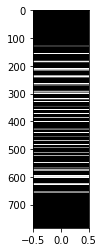

In [7]:
# print an input data for dnn model
# for cnn model we input the image as it is
plt.imshow(Xtrain[1].reshape(28*28,1), cmap='gist_gray',aspect=0.005)
print('Ytrain: ', Ytrain[1])

## DNN Model

Using Keras, create a Dense NN Sequential Model

Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
Add a dropout layer too.

![dnn](dnn.png)

In [8]:
# Create a sequential model object
dnnmodel = Sequential()

# Layer 1 = first hidden layer
# specify the input size for in the first layer.
dnnmodel.add(Dense(64, activation='relu', input_shape= (28*28,)))

# Layer 2 = second hidden layer 
dnnmodel.add(Dense(32, activation='relu'))

# Add dropout of 25% to layer 2
dnnmodel.add(Dropout(0.25))

# Layer 3 = output layer
dnnmodel.add(Dense(10, activation='softmax'))

dnnmodel.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


### Optimization of DNN

In [9]:
# Configure  the model for training, by using appropriate optimizers 
# Available optimizer: adam, rmsprop, adagrad, sgd etc.
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy etc.
# metrics: List of metrics to be evaluated by the model during training and testing. 

dnnmodel.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy', 
                 metrics=['accuracy'])

## CNN Model

Using Keras, create a Convolutional NN Sequential Model

Add 2-dim convolutional layers, specifying the number of kernels and its sizes in each layer and the activation function used in the layer.
Add a 2-dim maxpool layer of pool size 2.
Use L2 regularizer instead of Dropout.

![cnn](cnn.jpeg)

In [10]:
# Create a sequential model object
cnnmodel = Sequential()

# Layer 1 = first hidden layer
# specify the input size for in the first layer.
cnnmodel.add(Conv2D(64, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))

# Add a Maxpool layer
cnnmodel.add(MaxPool2D(pool_size=(2, 2)))

# Layer 2 = second hidden layer 
cnnmodel.add(Conv2D(32, (5,5), activation='relu', kernel_regularizer=l2(1e-04)))

# Add a Maxpool layer
cnnmodel.add(MaxPool2D(pool_size=(2, 2)))

# Flatten the outputs
cnnmodel.add(Flatten())

# Layer 3 = Dense layer
cnnmodel.add(Dense(128, activation='softmax'))

# Layer 4 = output layer
cnnmodel.add(Dense(10, activation='softmax'))

cnnmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

As you can see Dense Layers add lots of parameters (70%) and not the Convolutional layers.

For convolutional models output layers we generally don't use dense layers anymore and replace it with 1x1 and globalmaxpool2d layers. These are beyond this session.

### Optimization of CNN

In [11]:
# Configure  the model for training, by using appropriate optimizers 
# Available optimizer: adam, rmsprop, adagrad, sgd etc.
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy etc.
# metrics: List of metrics to be evaluated by the model during training and testing.

cnnmodel.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy', 
                 metrics=['accuracy'])

## Train the Model

In [12]:
# train the dnn model

historyd = dnnmodel.fit(Xtraind, Ytrain, epochs=10, batch_size=64)

Epoch 1/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.4694 - acc: 0.8618
Epoch 2/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2070 - acc: 0.9414
Epoch 3/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1585 - acc: 0.9548
Epoch 4/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1273 - acc: 0.9637
Epoch 5/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1091 - acc: 0.9682
Epoch 6/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0941 - acc: 0.9726
Epoch 7/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0874 - acc: 0.9743
Epoch 8/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0785 - acc: 0.9763
Epoch 9/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0731 - acc: 0.9780
Epoch 10/10
60000/60000 [==============================] - 3s 54us/sample - loss:

In [13]:
# train the cnn model

historyc = cnnmodel.fit(Xtrainc, Ytrain, epochs=10, batch_size=64)

Epoch 1/10
60000/60000 [==============================] - 49s 813us/sample - loss: 1.5534 - acc: 0.7436
Epoch 2/10
60000/60000 [==============================] - 56s 938us/sample - loss: 0.7953 - acc: 0.7954
Epoch 3/10
60000/60000 [==============================] - 54s 904us/sample - loss: 0.5253 - acc: 0.8017
Epoch 4/10
60000/60000 [==============================] - 50s 841us/sample - loss: 0.4198 - acc: 0.8041
Epoch 5/10
60000/60000 [==============================] - 52s 864us/sample - loss: 0.3713 - acc: 0.8058
Epoch 6/10
60000/60000 [==============================] - 47s 776us/sample - loss: 0.3453 - acc: 0.8100
Epoch 7/10
60000/60000 [==============================] - 50s 831us/sample - loss: 0.3267 - acc: 0.8128
Epoch 8/10
60000/60000 [==============================] - 47s 777us/sample - loss: 0.3153 - acc: 0.8203
Epoch 9/10
60000/60000 [==============================] - 41s 685us/sample - loss: 0.2928 - acc: 0.8911
Epoch 10/10
60000/60000 [==============================] - 43s 7

## Results and Outputs

### DNN

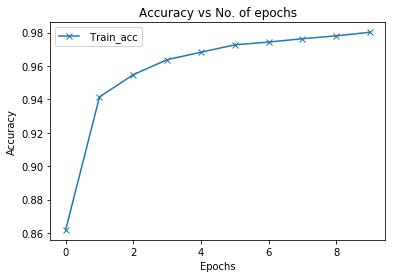

In [14]:
# training accuracy for dnn model
plt.plot(historyd.history['acc'], '-x', label=' Train_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs No. of epochs')
plt.legend()
plt.show()

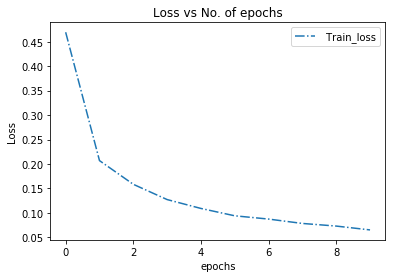

In [15]:
#training loss for dnn model
plt.plot(historyd.history['loss'], '-.', label=' Train_loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Loss vs No. of epochs')
plt.legend()
plt.show()

### CNN

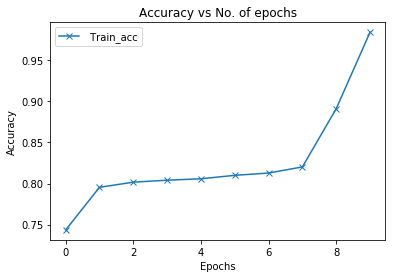

In [16]:
# training accuracy for cnn model
plt.plot(historyc.history['acc'], '-x', label=' Train_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs No. of epochs')
plt.legend()
plt.show()

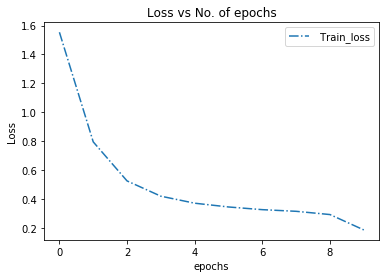

In [17]:
#training loss for cnn model
plt.plot(historyc.history['loss'], '-.', label=' Train_loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Loss vs No. of epochs')
plt.legend()
plt.show()

## Testing the Model

### DNN

In [18]:
# testing the dnn model

testLoss, testAccuracy = dnnmodel.evaluate(Xtestd, Ytest)

10000/10000 [==============================] - 1s 89us/sample - loss: 0.0863 - acc: 0.9739


In [19]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy * 100, '%')

Testing loss 	 0.08632604354599607
Testing accuracy  97.39000201225281 %


### CNN

In [20]:
# testing the cnn model

testLoss, testAccuracy = cnnmodel.evaluate(Xtestc, Ytest)

10000/10000 [==============================] - 3s 297us/sample - loss: 0.1531 - acc: 0.9881


In [21]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy * 100, '%')

Testing loss 	 0.1531226616859436
Testing accuracy  98.8099992275238 %


## Confusion Matrix

### DNN

In [22]:
# Confusion matrix for dnn model
predictions = dnnmodel.predict(Xtestd)
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(Ytest,axis=1)
print(confusion_matrix(true_labels, pred_labels))

[[ 973    0    0    2    1    0    2    0    1    1]
 [   0 1122    2    2    0    0    2    1    6    0]
 [   7    3 1000    5    3    0    3    5    6    0]
 [   1    1    3  993    0    2    0    4    2    4]
 [   0    0    4    0  970    0    2    1    1    4]
 [   4    0    0   21    2  846    5    3    7    4]
 [   5    3    1    0    6    4  936    0    3    0]
 [   1    6   11    5    4    0    0  993    2    6]
 [  15    0    6    9    6    3    4    3  926    2]
 [   3    2    1    4   13    0    0    4    2  980]]


### CNN

In [23]:
# Confusion matrix for cnn model
predictions = cnnmodel.predict(Xtestc)
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(Ytest,axis=1)
print(confusion_matrix(true_labels, pred_labels))

[[ 976    0    0    0    0    1    1    1    1    0]
 [   0 1129    2    0    0    0    0    1    1    2]
 [   0    1 1025    2    0    0    0    3    1    0]
 [   0    0    0 1006    0    0    0    3    0    1]
 [   0    0    0    0  963    0    3    0    0   16]
 [  11    0    0   12    0  865    2    0    2    0]
 [   5    1    0    0    1    2  946    0    3    0]
 [   0    2    2    0    0    0    0 1021    1    2]
 [   2    0    2    1    0    0    0    1  967    1]
 [   3    0    0    0    6    7    0    2    8  983]]


<h1><p style="text-align: center;">Thank you for the Patience!</p></h1>